<a href="https://colab.research.google.com/github/AleCongi/Esame-ICON-/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORT**

In [96]:
from nltk.corpus import wordnet as wn
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import AffinityPropagation
from nltk.corpus import stopwords
import sys
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.metrics import pairwise_distances

**DRIVE**

In [98]:
drive.mount('/content/drive', force_remount=False)

tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventsFixed.csv')

with open('drive/MyDrive/Colab Notebooks/stopwordsita.txt') as file:
  content=file.read()
lines=content.split('\n')
swSet=set(lines)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATASET FIX**

In [99]:
tot['id'].nunique() == len(tot['id'])
for index, row in tot.iterrows():
  
  try:
    trashId = row['id']
    trash = row['text'].lower()
  except AttributeError as ae:
    tot.drop(tot[tot['id'] == trashId].index, inplace=True)

tot = tot.drop_duplicates(subset="id", keep='last')
tot = tot.drop_duplicates(subset="text", keep='last')
tot['id'].nunique() == len(tot['id'])
tot.count()
tot.drop('isOpen',inplace=True,axis=1)
tot.drop('id',inplace=True,axis=1)
tot

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
...,...,...,...,...,...
7683,0,0,0,1,Hot Club Roma Trio\n\nMoreno Viglione chitarra...
7684,0,1,0,0,"Presentazione del libro:\n ""Tasmania"" (Einaudi..."
7685,0,1,1,1,In occasione delle GIORNATE EUROPEE DEL PATRIM...
7686,0,0,1,0,Vieni a Danzare gratuitamente per un giorno co...


**NLTK DOWNLOADS**

In [100]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**MAKE YOUR OWN STOPWORDS**

In [101]:
stopwordsTotali =stopwords.words('italian') + stopwords.words('english')

# THIS FUNCTION TAKES A STRING AND RETURNS A LIST OF RELATED WORDS 

In [106]:
def get_syns(description):
  test=[]
  words = nltk.word_tokenize(description)
  for every in words:
    if (every not in stopwordsTotali):
      if(wn.synsets(every, lang ='ita') == []):
        
          test.append(wn.synsets(every))
      else:
        
          test.append(wn.synsets(every, lang ='ita'))

  lemmatizer = WordNetLemmatizer()
  ciao =[]
  for each in range(len(test)):
    for q in range(len(test[each])):
      wordToAdd=lemmatizer.lemmatize(test[each][q].name().split('.')[0])
      ciao.append(wordToAdd)

  ciao=list(set(ciao))
  return ciao

**MODIFYING THE DATASET TO INCLUDES SYNS AND HYPERS AND HYPOS**

In [107]:
X1 = []
newText=tot['text'].tolist()

for description in newText:   
    feature =[]
    features = get_syns(str(description))
    words = ''
    for each in features:
      words = words + ' ' + each
    X1.append(words)

In [108]:
print(tot['text'][0])
print(X1[0])

Martedi 05 gennaio super tombolata al Barfly!
Tante calze da vincere!!!
Formula 10 euro panino patatine e bibita e la cartella la offriamo noi!
Consigliata la prenotazione
081660023
 rule ten superintendent extremely beat briefcase portfolio satchel overcome soft_drink surpass chip bail ace january win formula file booking acquire security prevail get_the_better_of super bun recipe french_fries euro folder


**EMBEDDINGS**

In [109]:
vectorizerTfIdf=TfidfVectorizer()
vectorTfIdf=vectorizerTfIdf.fit_transform(X1)
X_train1, X_test1 = train_test_split(vectorTfIdf, test_size=0.2, random_state=42) 

**K-MEAN**

In [110]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(X_train1)

KMeans(n_clusters=10)

**K-MEAN CLUSTERS**

In [111]:
# But you could fit the idf_df instea
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizerTfIdf.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: momentous adult important_person large distinguished
Cluster 1: starting_signal off street road away
Cluster 2: be get have exist experience
Cluster 3: nine forty twenty treatment illinois
Cluster 4: together simultaneously jointly ensemble whole
Cluster 5: only lonely lone alone entirely
Cluster 6: citation_form articulation rumor item voice
Cluster 7: dislodge complimentary exempt absolve rid
Cluster 8: six twenty music evening information
Cluster 9: construct cook produce do create


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
cluster_labels=km.labels_
len(cluster_labels)

5061

**FUCTION TO PREDICT CLOSEST CLUSTER AND CLOSEST SAMPLES IN THE SET**



In [114]:
def predict_closest_clusters(description, km, X_train1, vectorizerTfIdf):
    description=get_syns(description)
    newWords = ''
    for each in description:
      newWords = newWords + ' ' + each
    description=newWords
    # Transform the input description into a tf-idf representation
    input_tfidf = vectorizerTfIdf.transform([description])
    # Calculate the distances between the input and each of the 10 clusters
    cluster_distances = km.transform(input_tfidf).flatten()
    # Get the index of the closest cluster
    closest_cluster_index = np.argmin(cluster_distances)
    print("The closest cluster is cluster", closest_cluster_index)
    terms = vectorizerTfIdf.get_feature_names()
    top_ten_words = [terms[ind] for ind in order_centroids[closest_cluster_index, :5]]
    print("Its top ten words are: {}".format(', '.join(top_ten_words)))
    # Calculate the distances between the input and each sample in X_train1
    sample_distances = pairwise_distances(input_tfidf, X_train1).flatten()
    # Get the indices of the 5 closest samples
    closest_sample_indices = sample_distances.argsort()[:5]
    print("The 5 closest samples in X_train1 are:")
    for i in closest_sample_indices:
        print(i)
        



**TEST FUNCTION**

In [115]:
descrizione='potato chips and cocacola'
predict_closest_clusters(description, km, X_train1,vectorizerTfIdf)

The closest cluster is cluster 4
Its top ten words are: together, simultaneously, jointly, ensemble, whole
The 5 closest samples in X_train1 are:
1176
2668
1852
1932
1934


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


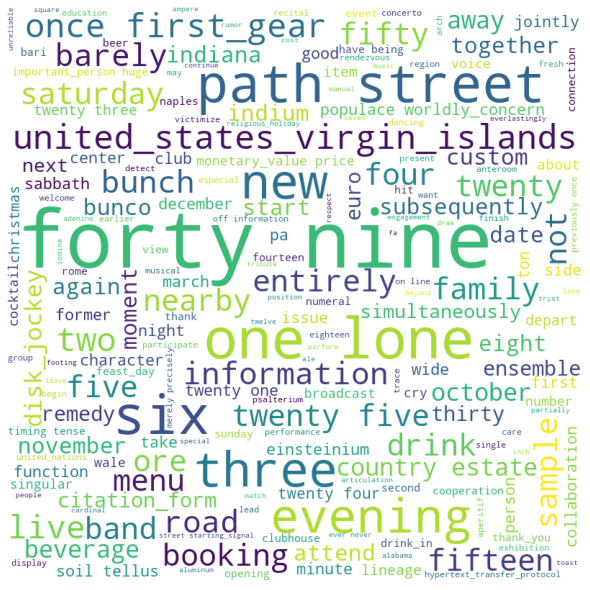

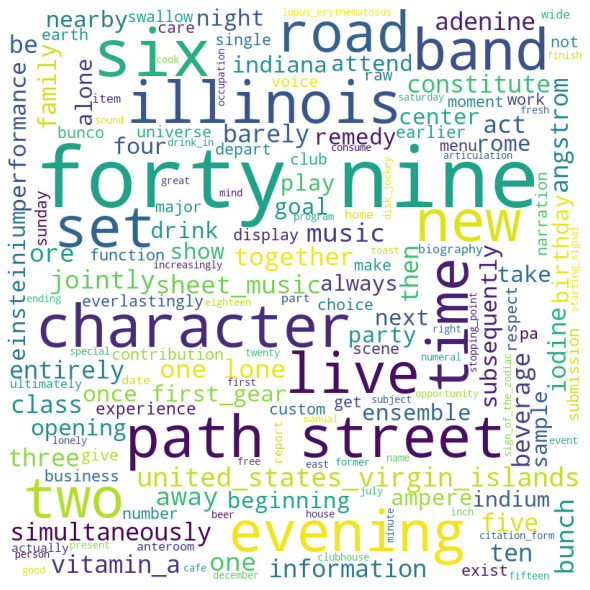

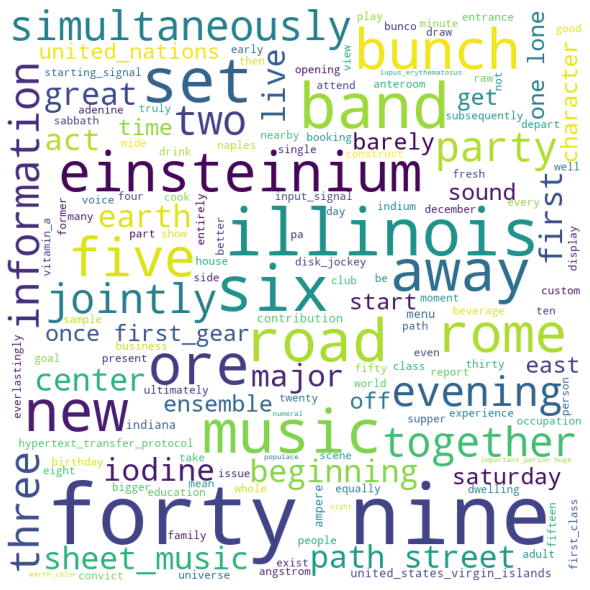

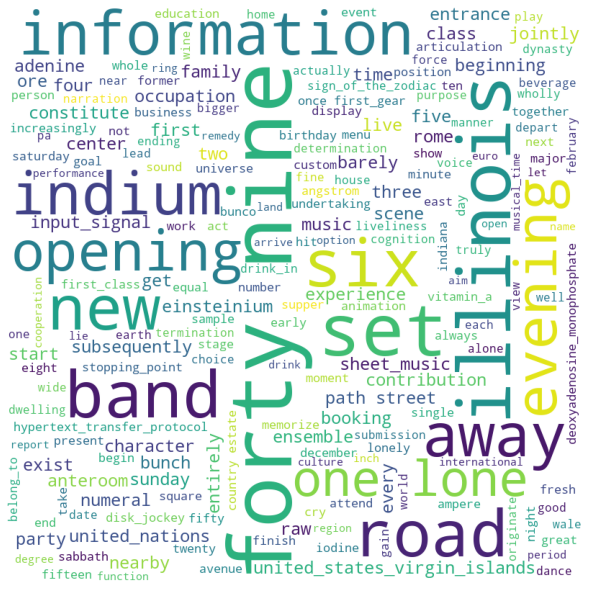

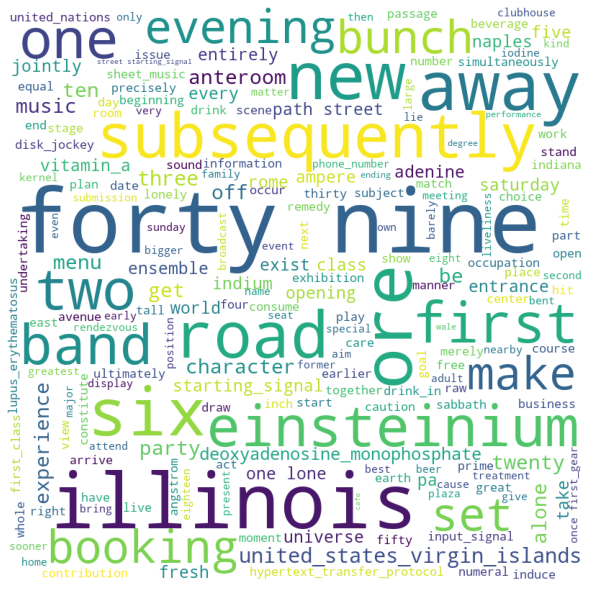

In [122]:
labels=km.labels_
cluster_labels = np.unique(labels)
cluster_sizes = [(labels == c).sum() for c in cluster_labels]
sizes_idx = np.argsort(cluster_sizes)[::-1][:5]
X1=X1[:5061]
# Plot dei risultati
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(X1)[mask]
    text = " ".join(descrizioni_c)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = swSet, 
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

